In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

# preparing train and test data
transform_data = torchvision.transforms.ToTensor()
train_data = torchvision.datasets.FashionMNIST('./data', train=True, download=True, transform=transform_data)
test_data = torchvision.datasets.FashionMNIST('./data', train=False, download=True, transform=transform_data)

# creating data loaders to load data during training and testing
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = 128, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = 128, shuffle = False)

In [2]:
# basic nn model for classifying data
class BasicNetwork(nn.Module):
  def __init__(self):
    super(BasicNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )
  def forward(self, x):
    x = self.flatten(x)
    output = self.linear_stack(x)
    return output

In [3]:
# initializing model, loss function and optimizer
model = BasicNetwork()
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)

In [4]:
# passing the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


BasicNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [5]:
# training the model
epochs = 5
losses = []
for epoch in range(epochs):
  for images, labels in train_loader:
    images = images.to(device)
    outputs = model(images)
    loss = loss_function(outputs, labels)
    losses.append(loss.cpu().data.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch}/{epochs-1}')
  print(f'loss: {loss}')

Epoch 0/4
loss: 0.32218900322914124
Epoch 1/4
loss: 0.4056459665298462
Epoch 2/4
loss: 0.2541601061820984
Epoch 3/4
loss: 0.2823174297809601
Epoch 4/4
loss: 0.30299147963523865


In [ ]:
# PATH = './basic_network.pth'
# torch.save(model.state_dict(), PATH)

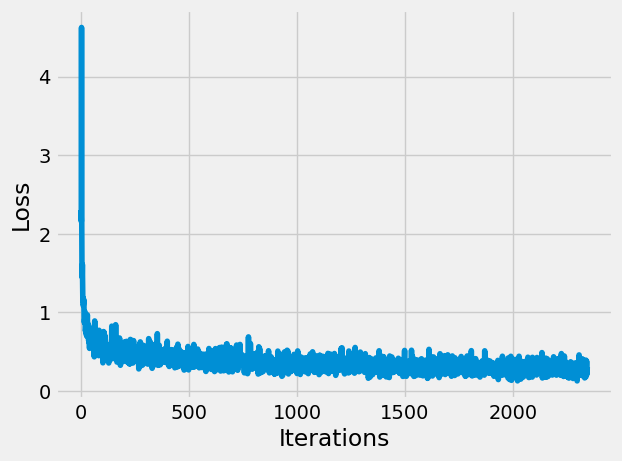

In [6]:
# plot of the loss value over all iterations
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses[:])

In [ ]:
# model = BasicNetwork()
# model.load_state_dict(torch.load(PATH, weights_only=True))

In [7]:
# evaluating the model using test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy: {correct/total}')

Accuracy: 0.8744


Class: 9
Predicted: tensor([9])


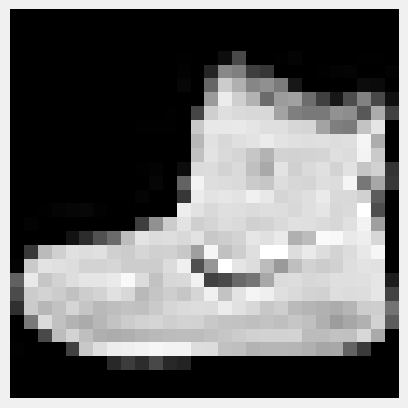

In [8]:
# example prediction
image_tensor, label = train_data[0]
with torch.no_grad():
  outputs = model(image_tensor.to(device))

plt.imshow(image_tensor[0,:,:],cmap = 'gray')
plt.axis('off')
print(f'Class: {label}\nPredicted: {torch.max(outputs, 1).indices}')

| Label | Class |
|---|---|
| 0 |	T-shirt/top |
| 1 |	Trouser |
| 2 |	Pullover |
| 3 |	Dress |
| 4 |	Coat |
| 5 |	Sandal |
| 6 |	Shirt |
| 7 |	Sneaker |
| 8 |	Bag |
| 9 |	Ankle boot |